In [2]:
import pandas as pd
from itertools import chain
import matplotlib.pyplot as plt
%matplotlib inline

ARXIV_FP= "data/arxivData.json"

In [3]:
# read the arxiv input json file
df = pd.read_json(ARXIV_FP, orient='records')

# flatten author list names.
# this is not the most elegant but is made to handle the variation in single/double quotes for name values:
# "author": "[{'name': 'Luciano Serafini'}, {'name': \"Artur d'Avila Garcez\"}]",
df['author_list'] = df['author'].apply(lambda author_str: [x.strip()[10:-2] for x in author_str[1:-1].split(",")])

 # flatten tags list
def flatten_tags(tag_str):
    tags = tag_str[1:-1].split("{'term': '")
    tags = list(filter(None, [tag.strip()[:tag.find("'")] for tag in tags]))
    return tags
df['tags_list'] = df['tag'].apply(flatten_tags)
df.head()

,author,day,id,link,month,summary,tag,title,year,author_list,tags_list
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,1802.00209v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",2,We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018,"[Ahmed Osman, Wojciech Samek]","[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]"
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,1603.03827v1,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",3,Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016,"[Ji Young Lee, Franck Dernoncourt]","[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]"
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,1606.00776v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",6,We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016,"[Iulian Vlad Serban, Tim Klinger, Gerald Tesau...","[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML, I.5.1; I..."
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,1705.08142v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",5,Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017,"[Sebastian Ruder, Joachim Bingel, Isabelle Aug...","[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]"
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,1709.02349v2,"[{'rel': 'alternate', 'href': 'http://arxiv.or...",9,We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017,"[Iulian V. Serban, Chinnadhurai Sankar, Mathie...","[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML, I.5.1; I..."


In [19]:
unique_lists_tags = df['tags_list'].values
# unique_lists_tags
list_of_tags = list(chain(*unique_lists_tags))
# print(list_of_tags)
df_tags = pd.DataFrame(list_of_tags, columns=["tag"])
df_tags = df_tags.groupby(["tag"]).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
df_tags['perc']= df_tags['counts']/df_tags['counts'].sum()
df_tags['perc_articles']= df_tags['counts']/len(df.index)
print(df_tags['counts'].sum())
df_tags.head(10)

80579


,tag,counts,perc,perc_articles
2169,cs.CV,13902,0.172526,0.339073
2184,cs.LG,13735,0.170454,0.335000
2161,cs.AI,10481,0.130071,0.255634
2290,stat.ML,10326,0.128148,0.251854
2166,cs.CL,6417,0.079636,0.156512
2190,cs.NE,3819,0.047394,0.093146
2182,cs.IR,1443,0.017908,0.035195
2235,math.OC,1020,0.012658,0.024878
2196,cs.RO,973,0.012075,0.023732
2185,cs.LO,643,0.007980,0.015683


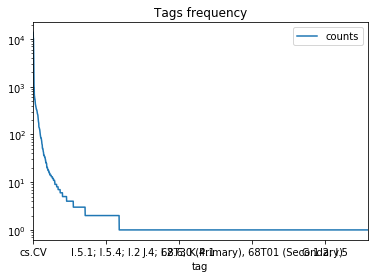

In [69]:
df_tags.plot(kind='line',x="tag", y="counts", logy=True, title='Tags frequency');

In [12]:
print("Number of tags appearing more than once: {}".format(len(df_tags[df_tags["counts"]>=2].index)))

Number of tags appearing more than once: 590


In [33]:
 import itertools
# look at co-occurrences of tags
tags=[
    [0 ,"cs.CV","Computer Vision and Pattern Recognition",13902],
[1, "cs.LG","Machine Learning (CS)",13735],
[2, "cs.AI","Artificial Intelligence",50481],
[3, "stat.ML","Machine Learning (Stat)",10326],
[4, "cs.CL","Computation and Language",6417],
[5, "cs.NE","Neural and Evolutionary Computing",3819],
[6, "cs.IR","Information Retrieval",1443],
[7, "math.OC","Optimization and Control",1020],
[8, "cs.RO","Robotics",973],
[9, "cs.LO","Logic in Computer Science",643],
[10, "cs.SI","Social and Information Networks",639]
    ]

for tag in tags:
    print("{{\"sets\": [{}], \"label\": \"{}\", \"size\": {}}},".format(tag[0], tag[2], tag[3]))

# for tag1, tag2 in list(itertools.combinations(tags, 2)):
tag1 = tags[2]
for tag2 in tags:
    if tag!=tag1:
        unique_lists_tags = df['tags_list'].values
        cooccur = [((tag1[1] in list_tags) & (tag2[1] in list_tags))  for list_tags in unique_lists_tags]
        print("{{\"sets\": [{}, {}], \"size\": {}}},".format(tag1[0], tag2[0], sum(cooccur)))

{"sets": [0], "label": "Computer Vision and Pattern Recognition", "size": 13902},
{"sets": [1], "label": "Machine Learning (CS)", "size": 13735},
{"sets": [2], "label": "Artificial Intelligence", "size": 50481},
{"sets": [3], "label": "Machine Learning (Stat)", "size": 10326},
{"sets": [4], "label": "Computation and Language", "size": 6417},
{"sets": [5], "label": "Neural and Evolutionary Computing", "size": 3819},
{"sets": [6], "label": "Information Retrieval", "size": 1443},
{"sets": [7], "label": "Optimization and Control", "size": 1020},
{"sets": [8], "label": "Robotics", "size": 973},
{"sets": [9], "label": "Logic in Computer Science", "size": 643},
{"sets": [10], "label": "Social and Information Networks", "size": 639},
{"sets": [2, 0], "size": 993},
{"sets": [2, 1], "size": 2930},
{"sets": [2, 2], "size": 10481},
{"sets": [2, 3], "size": 1427},
{"sets": [2, 4], "size": 679},
{"sets": [2, 5], "size": 567},
{"sets": [2, 6], "size": 362},
{"sets": [2, 7], "size": 141},
{"sets": [2,

In [16]:
lengths = [len(i) for i in unique_lists_tags]
print("Mean number of tags per article: {}".format((float(sum(lengths)) / len(lengths))))

Mean number of tags per article: 1.9653414634146342


In [74]:
# set 1 if cs.AI is in the list
filter_tag = "cs.AI"
Y = [int((filter_tag in tags) == True) for tags in unique_lists_tags]
print(sum(Y))

10481


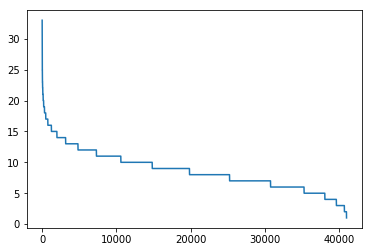

In [18]:
# token length of titles 
import numpy as np
titles = df["title"].values.tolist()
titles = [title.replace('\n ', '').replace('\r', '') for title in titles]
titles_len = np.sort([len(title.split(" ")) for title in titles])[::-1]
max(titles_len)
max(titles_len)
plt.plot(titles_len)

In [89]:
len(np.where( titles_len > 25 )[0])

14